In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
species_info = pd.read_csv('species_info.csv')
print(species_info.head())

  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  
0                           Gapper's Red-Backed Vole                 NaN  
1                              American Bison, Bison                 NaN  
2  Aurochs, Aurochs, Domestic Cattle (Feral), Dom...                 NaN  
3  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)                 NaN  
4                                      Wapiti Or Elk                 NaN  


In [7]:
observations = pd.read_csv('observations.csv')
print(observations.head())

            scientific_name                            park_name  observations
0        Vicia benghalensis  Great Smoky Mountains National Park            68
1            Neovison vison  Great Smoky Mountains National Park            77
2         Prunus subcordata               Yosemite National Park           138
3      Abutilon theophrasti                  Bryce National Park            84
4  Githopsis specularioides  Great Smoky Mountains National Park            85


In [8]:
# Check data types and null values
print("\nData Types and Null Values:")
print(species_info.info())
print(observations.info())



Data Types and Null Values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB
None


In [9]:
print("\nSummary Statistics for Observations:")
print(observations.describe())


Summary Statistics for Observations:
       observations
count  23296.000000
mean     142.287904
std       69.890532
min        9.000000
25%       86.000000
50%      124.000000
75%      195.000000
max      321.000000


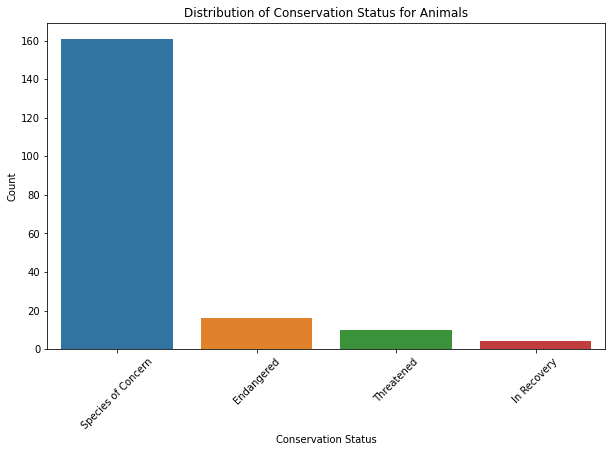

In [10]:
plt.figure(figsize=(10, 6))
sns.countplot(data=species_info, x='conservation_status')
plt.title("Distribution of Conservation Status for Animals")
plt.xlabel("Conservation Status")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

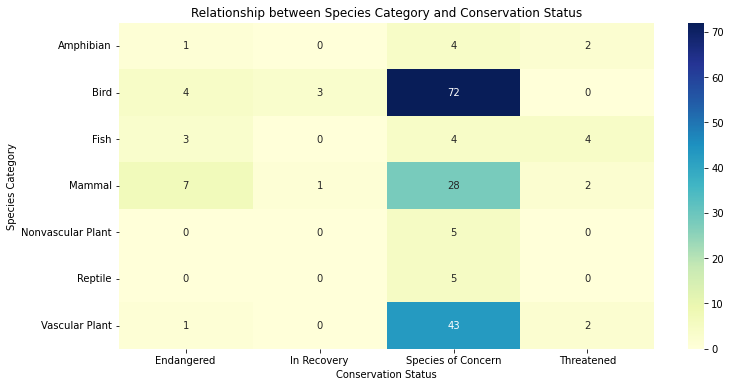

In [11]:
cross_tab = pd.crosstab(species_info['category'], species_info['conservation_status'])
plt.figure(figsize=(12, 6))
sns.heatmap(cross_tab, annot=True, cmap='YlGnBu', fmt='d')
plt.title("Relationship between Species Category and Conservation Status")
plt.xlabel("Conservation Status")
plt.ylabel("Species Category")
plt.show()

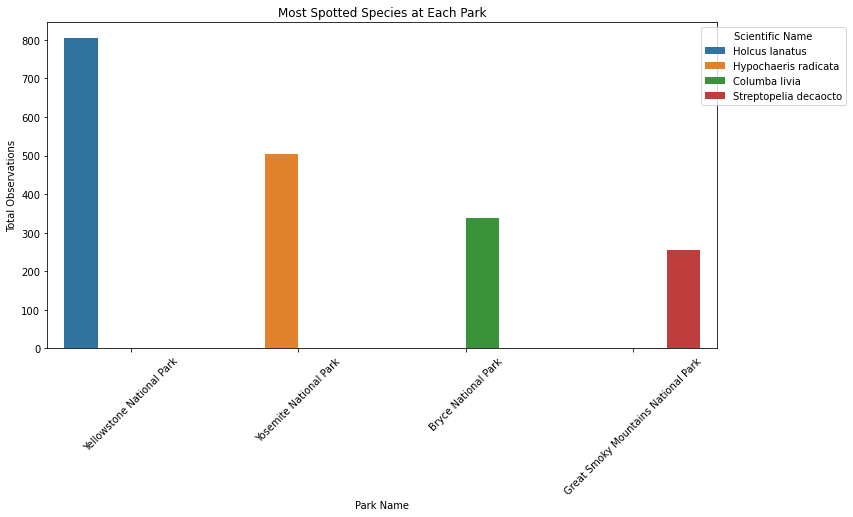

In [12]:
most_spotted_species = observations.groupby(['park_name', 'scientific_name'])['observations'].sum().reset_index()
most_spotted_species = most_spotted_species.sort_values(by='observations', ascending=False)
most_spotted_species = most_spotted_species.drop_duplicates(subset='park_name')

plt.figure(figsize=(12, 6))
sns.barplot(data=most_spotted_species, x='park_name', y='observations', hue='scientific_name')
plt.title("Most Spotted Species at Each Park")
plt.xlabel("Park Name")
plt.ylabel("Total Observations")
plt.xticks(rotation=45)
plt.legend(title='Scientific Name', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()